In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [5]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [6]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [7]:
#Calculamos el numero total de la población "n"
Mexico['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [8]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['host_response_rate'].max()
Min = Mexico['host_response_rate'].min()
Limites = [Min, Max]
Limites

[0.38, 1.0]

In [9]:
# Calculamos el rango R
R = Max - Min
R

0.62

In [10]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [11]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.039516544372383215

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [12]:
# Categorización de variables
intervalos = np.linspace (0.38, 1, 16)
intervalos

array([0.38      , 0.42133333, 0.46266667, 0.504     , 0.54533333,
       0.58666667, 0.628     , 0.66933333, 0.71066667, 0.752     ,
       0.79333333, 0.83466667, 0.876     , 0.91733333, 0.95866667,
       1.        ])

In [13]:
# Creamos las categorias

categorias = [
    "Sin respuesta",
    "Muy baja respuesta",
    "Baja respuesta",
    "Respuesta mínima",
    "Respuesta limitada",
    "Respuesta moderada",
    "Respuesta estándar",
    "Buena respuesta",
    "Respuesta alta",
    "Respuesta muy alta",
    "Casi siempre responde",
    "Respuesta máxima",
    "Respuesta potencial",
    "Respuestas consistentes",
    "Respuesta rapida"
]


In [14]:
# Creamos las ctegorias en la columna numerica
Mexico['host_response_rate'] = pd.cut ( x = Mexico ['host_response_rate'], bins = intervalos, labels = categorias )
Mexico['host_response_rate']

0        Respuesta rapida
1        Respuesta rapida
2         Buena respuesta
3        Respuesta rapida
4        Respuesta rapida
               ...       
26577    Respuesta rapida
26578    Respuesta rapida
26579    Respuesta rapida
26580    Respuesta rapida
26581    Respuesta rapida
Name: host_response_rate, Length: 26582, dtype: category
Categories (15, object): ['Sin respuesta' < 'Muy baja respuesta' < 'Baja respuesta' < 'Respuesta mínima' ... 'Respuesta máxima' < 'Respuesta potencial' < 'Respuestas consistentes' < 'Respuesta rapida']

In [15]:
table1 = freq_tbl(Mexico['host_response_rate'])
table1

,host_response_rate,frequency,percentage,cumulative_perc
0,Respuesta rapida,20357,0.765819,0.766309
1,Respuestas consistentes,4110,0.154616,0.921024
2,Respuesta potencial,844,0.031751,0.952795
3,Casi siempre responde,325,0.012226,0.965029
4,Buena respuesta,226,0.008502,0.973537
5,Baja respuesta,217,0.008163,0.981705
6,Respuesta máxima,137,0.005154,0.986862
7,Respuesta alta,97,0.003649,0.990514
8,Respuesta moderada,75,0.002821,0.993337
9,Sin respuesta,49,0.001843,0.995182


In [16]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_response_rate,frequency
0,Respuesta rapida,20357
1,Respuestas consistentes,4110
2,Respuesta potencial,844
3,Casi siempre responde,325
4,Buena respuesta,226
5,Baja respuesta,217
6,Respuesta máxima,137
7,Respuesta alta,97
8,Respuesta moderada,75
9,Sin respuesta,49


In [17]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('host_response_rate')
Filtro_index

,frequency
host_response_rate,
Respuesta rapida,20357
Respuestas consistentes,4110
Respuesta potencial,844
Casi siempre responde,325
Buena respuesta,226
Baja respuesta,217
Respuesta máxima,137
Respuesta alta,97
Respuesta moderada,75


<Axes: xlabel='host_response_rate'>

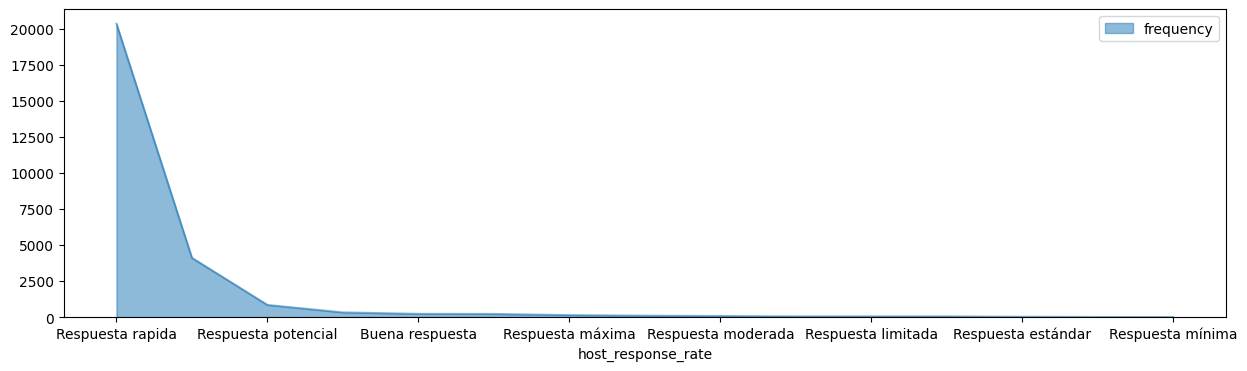

In [18]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)